In [1]:
using Plots: scatter, scatter!, plot, plot!
using Flux
using StaticArrays
using Random: randperm

In [2]:
n = 100
dx = rand(n)
dy = sin.(4*pi*dx) + 0.1*randn(n);

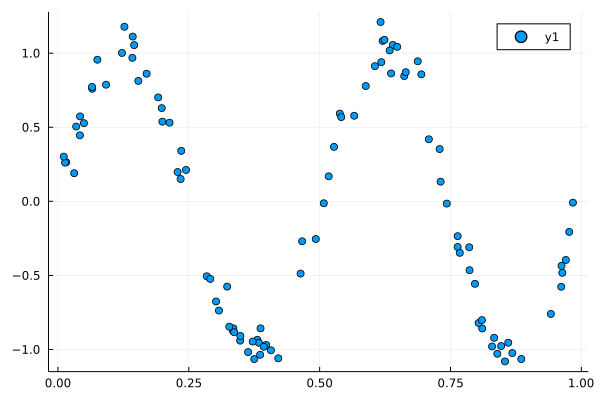

In [3]:
scatter(dx, dy)

In [4]:
m = Chain(Dense(1,50,σ), Dense(50,50,σ), Dense(50,1))

Chain(
  Dense(1, 50, σ),                      # 100 parameters
  Dense(50, 50, σ),                     # 2_550 parameters
  Dense(50, 1),                         # 51 parameters
)                   # Total: 6 arrays, 2_701 parameters, 10.926 KiB.

In [5]:
# loss(x, y) = Flux.mse(m(x), y)
loss(x, y) = sum((m(x)-y).^2)

loss (generic function with 1 method)

In [6]:
data = [(SVector(dx[i]), SVector(dy[i])) for i in 1:length(dx)]

100-element Vector{Tuple{SVector{1, Float64}, SVector{1, Float64}}}:
 ([0.7292205219534872], [0.3526385961272301])
 ([0.28434598222192187], [-0.5059507561192507])
 ([0.34807527424814966], [-0.9404282498059969])
 ([0.4068278656629378], [-1.005477746465595])
 ([0.8603334254647022], [-0.9543794943412339])
 ([0.23555472737312122], [0.34044695960000937])
 ([0.7864001575994544], [-0.4649035640318353])
 ([0.5078901359926776], [-0.013038774367824038])
 ([0.375079993718305], [-1.06496845763691])
 ([0.19828932721942905], [0.6289147623603953])
 ([0.9838993883915887], [-0.009002090983230876])
 ([0.6398338175780853], [1.0558403082360177])
 ([0.7635861643268039], [-0.3084960742255053])
 ⋮
 ([0.8852956882307816], [-1.0642509164224572])
 ([0.4209494358655561], [-1.0594998925503183])
 ([0.16938721977645355], [0.8610490076794015])
 ([0.041939252020139484], [0.4453728532252035])
 ([0.21317477447819344], [0.5307107723299498])
 ([0.01108410499902135], [0.30174356699332405])
 ([0.3933586792121675], [-0.9816

1000

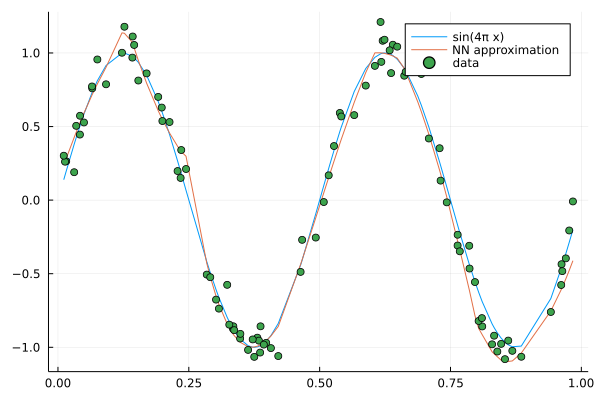

In [10]:
for i in 1:1000
    Flux.train!(loss, Flux.params(m), data, ADAM())
    if i%10 == 0
        p = plot(sort(dx), x->(sin(4*pi*x)), label="sin(4π x)")
        plot!(p, sort(dx), first.(m.(SVector.(sort(dx)))), label="NN approximation")
        scatter!(p, dx, dy, label="data")
        IJulia.clear_output(true)
        display(i)
        display(p)
    end
end

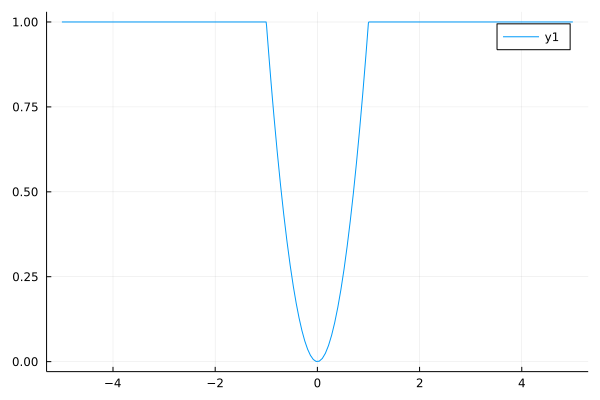

In [8]:
mynl(x) = min(1.0, max(0.0, x^2))
plot(mynl)

In [9]:
m = Chain(Dense(1,50,mynl), Dense(50,50,mynl), Dense(50,1))

Chain(
  Dense(1, 50, mynl),                   # 100 parameters
  Dense(50, 50, mynl),                  # 2_550 parameters
  Dense(50, 1),                         # 51 parameters
)                   # Total: 6 arrays, 2_701 parameters, 10.926 KiB.

In [13]:
@which Dense(50,50, σ)

Dense(in::Integer, out::Integer, σ; initW, initb, init, bias) in Flux at /home/zach/.julia/packages/Flux/qAdFM/src/layers/basic.jl:133

In [47]:
using Zygote

In [15]:
f(x) = 5x+3

f (generic function with 1 method)

In [48]:
f'(10)

5.0

In [49]:
@code_llvm f'(1)

;  @ /home/zach/.julia/packages/Zygote/FPUm3/src/compiler/interface.jl:81 within `#59`
define double @"julia_#59_10912"(i64 signext %0) #0 {
top:
;  @ /home/zach/.julia/packages/Zygote/FPUm3/src/compiler/interface.jl:83 within `#59`
  ret double 5.000000e+00
}


In [50]:
function g(x)
    y = zero(x)
    for i in 1:10
        y += x
    end
    return y
end

g (generic function with 1 method)

In [51]:
g'(5)

10

In [52]:
using BenchmarkTools
@benchmark g'(5)

BenchmarkTools.Trial: 10000 samples with 4 evaluations.
 Range (min … max):   7.723 μs …  3.403 ms  ┊ GC (min … max): 0.00% … 99.40%
 Time  (median):      9.280 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   10.831 μs ± 34.103 μs  ┊ GC (mean ± σ):  3.12% ±  0.99%

   ██▃▃▄▂▁▁                                                    
  ██████████▆▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▂▂▂▁▂▂▁▁▁▁▁▁▁▁ ▂
  7.72 μs         Histogram: frequency by time        21.5 μs <

 Memory estimate: 4.39 KiB, allocs estimate: 83.

In [53]:
@benchmark g(5)

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  1.813 ns … 19.487 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     2.038 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   2.088 ns ±  0.446 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █  ▆  ▁▆▂ ▂▆▂  █▆  ▃ ▁▁     ▁            ▁  ▁▁        ▁▁   ▂
  █▇▇██████▆████▇██▆██▇█████▇█████▇▇▆▇▇▇█████████████▇█████▇ █
  1.81 ns      Histogram: log(frequency) by time     2.94 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

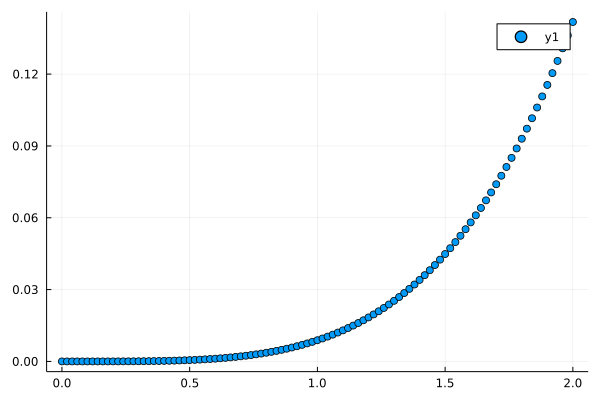

In [22]:
xs = collect(0.0:0.02:2.0)
scatter(xs, first.(m.(SVector.(xs))))


In [67]:
n = 100
f(x) = cos.(20*x^2)
approaches = Dict()

function add_approach!(approaches; name, dx)
    
    dy = f.(dx)
    m = Chain(Dense(1,50,σ), Dense(50,50,σ), Dense(50,1))
    loss = (x,y) -> sum((m(x)-y).^2)
    
    approaches[name] = (
        dx = dx,
        dy = dy,
        data = [(SVector(dx[i]), SVector(dy[i])) for i in 1:length(dx)],
        m = m,
        loss = loss
    )
end

add_approach!(approaches, name="random", dx = rand(n))
add_approach!(approaches, name="linrange", dx = LinRange(0,1,n))

(dx = range(0.0, stop=1.0, length=100), dy = [1.0, 0.9999979179600111, 0.9999666875335731, 0.9998313594425318, 0.9994670449248038, 0.998699006750542, 0.9973028885125452, 0.9950051838306286, 0.9914840755977954, 0.9863708030757867  …  -0.6815172719185082, -0.3713698147604952, -0.007052567601621131, 0.36204414556613124, 0.6831399088335544, 0.9076825947266263, 0.9990621966374388, 0.9391923207191087, 0.7327484203413519, 0.40808206181339196], data = Tuple{SVector{1, Float64}, SVector{1, Float64}}[([0.0], [1.0]), ([0.010101010101010102], [0.9999979179600111]), ([0.020202020202020204], [0.9999666875335731]), ([0.030303030303030304], [0.9998313594425318]), ([0.04040404040404041], [0.9994670449248038]), ([0.050505050505050504], [0.998699006750542]), ([0.06060606060606061], [0.9973028885125452]), ([0.0707070707070707], [0.9950051838306286]), ([0.08080808080808081], [0.9914840755977954]), ([0.09090909090909091], [0.9863708030757867])  …  ([0.9090909090909091], [-0.6815172719185082]), ([0.919191919

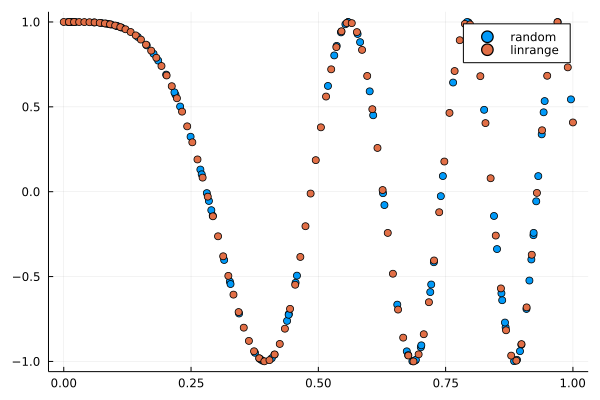

In [68]:
p = plot()
for (k, v) in approaches
    scatter!(p, v.dx, v.dy, label=k)
end
p

2000

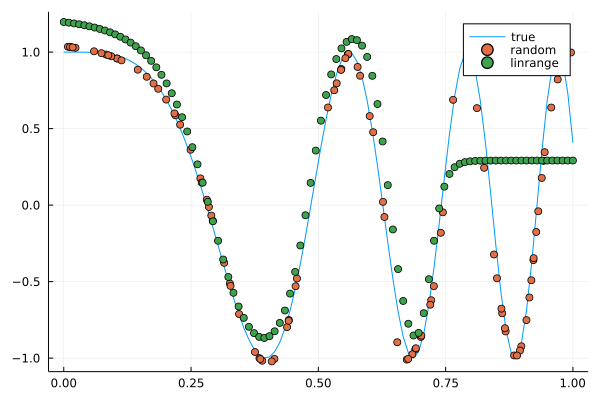

In [70]:
for i in 1:2000
    p = plot(LinRange(0,1,n), f, label="true")
    for (k,v) in approaches
        Flux.train!(v.loss, Flux.params(v.m), v.data, ADAM())
        if i%10 == 0
            scatter!(p, v.dx, [first(y) for y in v.m.(d[1] for d in v.data)], label=k)
        end
    end
    if i%20 == 0
        IJulia.clear_output(true)
        display(i)
        display(p)
    end
end